## A time study for NNS using CUDA and Serial Code 

The time study is done using a separate code which generates random particles in a domain and then Cuda NNS and serial NNS is operated on that domain. The resulting `neighb` arrays are compared for *number of neighbours* and *particle ids*. As of now, all the tests are passing. The time study is done using the `chrono` module in C++. The functions used are `neighbour_cuda_1()` and `NEIGHBOUR_serial()`. The time is averaged over three trials. 

Number of threads per block are currently set to **512** using `THREADS_PER_BLOCK` definition. Also, the maximum number of neighbours is restricted to **1500** using `MAX_NEIGHB` variable. Both of these can be changed if required.



In [11]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [12]:
no_of_particles = 10000*(np.arange(9)+1)
time_cuda = np.array([146, 157, 229, 318, 413, 543, 646, 736, 854])
time_cuda_2 = np.array([169, 174, 233, 352, 484, 517, 680, 790, 789])
time_cuda_3 = np.array([169, 160, 228, 346, 439, 484, 674, 735, 878])
time_serial = np.array([20572, 39508, 58623, 79313, 98786, 118668, 139976, 160084, 179662])
time_serial_2 =np.array([20965, 39373, 59252, 79225, 99280, 119416, 140059, 160397, 181007])
time_serial_3 = np.array([20830, 39363, 59173, 79123, 99519, 119545, 138972, 160138,180773 ])

avg_time_cuda = ( time_cuda + time_cuda_2 + time_cuda_3 ) / 3
avg_time_serial = (time_serial + time_serial_2 + time_serial_3)/3


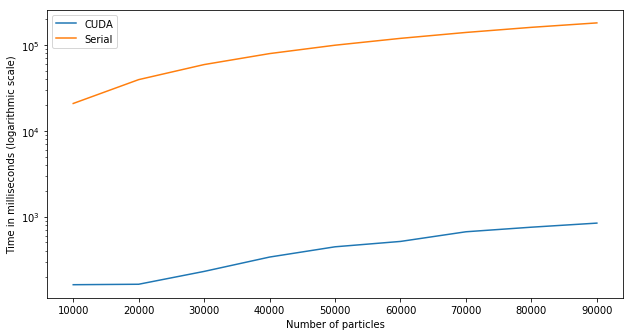

In [19]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(no_of_particles, avg_time_cuda)
ax.plot(no_of_particles, avg_time_serial)
ax.legend(['CUDA', 'Serial'])
plt.xlabel("Number of particles")
plt.ylabel('Time in milliseconds (logarithmic scale)')
plt.yscale('log')
plt.savefig('time.png')
plt.show()

In [20]:
avg_time_serial/avg_time_cuda

array([129, 241, 256, 234, 222, 231, 209, 212, 214])

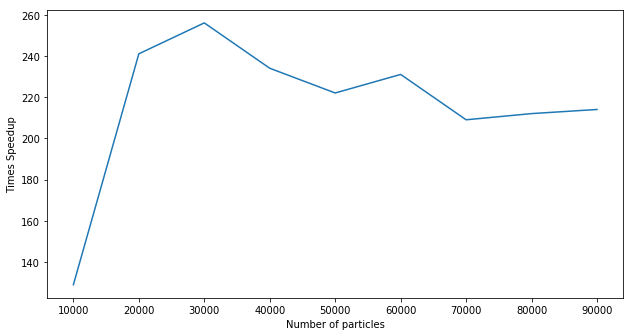

In [21]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(no_of_particles, avg_time_serial/avg_time_cuda)
plt.xlabel("Number of particles")
plt.ylabel('Times Speedup')
plt.savefig('speedup.png')
plt.show()